# Exercici 1

## Explica quines comandes de Linux pots fer servir a l’hora d’analitzar logs escrits a fitxer per a:

### Veure contínuament els logs que es van escrivint a un arxiu:

Per veure els logs contínuament hauríem d’utilitzar la comanda `tail -f` o també podríem utilitzar una altra comanda `less +f`. Aquestes línies fan el mateix, mostren les noves línies a temps real. També fa falta que indiquem el nom de l'arxiu si estem al directori on es troba o la ruta sencera si està en un altre directori.

### Cercar una paraula concreta dintre d’un arxiu de log:

Per cercar només una paraula a un fitxer, el que hem de fer és `grep "paraula"`. Podem combinar el `grep` amb les comandes anteriors per poder buscar als nous logs aquells problemes específics.

# Exercici 2

El concepte **logging** és molt important en la programació, alhora que està estrictament relacionat amb el tema que estem treballant. Un log en el nostre àmbit vindria a ser un fitxer que conté dades relacionades amb els principals esdeveniments i successos que ocorren en un programa o en un sistema operatiu. Així doncs, ja sigui per saber en quin punt hem tingut un error, perquè l'execució del programa no ha anat bé, o quina sèrie de passes ha seguit una persona mentre utilitzava la nostra aplicació i moltes altres utilitats, els logs són vitals al món del software.

En aquest exercici recuperarem el bucle d’exemple que vam fer servir a les sessions de teoria, i configurarem el log perquè els missatges d’error (i superiors) vagin a un arxiu, i els missatges d’info (i superiors) vagin a un altre arxiu, mentre que tots els missatges es mostren a la vegada per pantalla. A més, afegirem un nou missatge d’info a l’aplicació pel que farem servir un logger especial i diferent del que ja hem fet servir, i que tindrà un manegador amb format CSV.

## Tasques

1. Configurar els logs d’info a un fitxer de logs d’info i els logs d’error a un fitxer de logs d’error.
2. Afegir, a més del handler de fitxer per a fitxers info, un handler de pantalla amb nivell info.
3. Afegir un nou logger amb un nou manegador i un nou formatador a CSV, i afegir una línia al programa que generi aquests logs.
4. Pujar al repositori una mostra d’unes 20 línies dels fitxers de logs generats per la vostra aplicació: un d’info, un d’error, i un en format CSV.

In [7]:
import logging
from logging import FileHandler, StreamHandler, Formatter
from time import sleep
import os

# Crear la carpeta para los archivos de salida si no existe
output_dir = 'Exercici_2_Output'
os.makedirs(output_dir, exist_ok=True)

# Configurar logger principal
logger = logging.getLogger('MainLogger')
logger.setLevel(logging.DEBUG)

# Manejador para errores (y superiores)
error_handler = FileHandler(os.path.join(output_dir, 'errors.log'))
error_handler.setLevel(logging.ERROR)
error_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manejador para información (y superiores)
info_handler = FileHandler(os.path.join(output_dir, 'info.log'))
info_handler.setLevel(logging.INFO)
info_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manejador para mostrar todo en la consola
console_handler = StreamHandler()
console_handler.setLevel(logging.DEBUG)
console_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Agregar manejadores al logger principal
logger.addHandler(error_handler)
logger.addHandler(info_handler)
logger.addHandler(console_handler)

# Logger con formato CSV
csv_logger = logging.getLogger('CSVLogger')
csv_logger.setLevel(logging.INFO)

# Manejador para el logger CSV
csv_handler = FileHandler(os.path.join(output_dir, 'csv_logs.csv'))
csv_handler.setFormatter(Formatter('%(asctime)s, %(levelname)s, %(message)s'))
csv_logger.addHandler(csv_handler)

# Crear un bucle que genere logs de tipo INFO y ERROR
for i in range(40):
    sleep(1)
    if i % 2 == 0:
        logger.info(f"Aquest és el log d'informació número {i+1}")
    else:
        logger.error(f"Aquest és el log d'error número {i+1}")

# Mensaje de información adicional con el logger CSV
csv_logger.info('Missatge especial registrat en format CSV.')

2025-02-26 13:07:50,894 - INFO - Aquest és el log d'informació número 1
2025-02-26 13:07:51,895 - ERROR - Aquest és el log d'error número 2
2025-02-26 13:07:52,896 - INFO - Aquest és el log d'informació número 3
2025-02-26 13:07:53,897 - ERROR - Aquest és el log d'error número 4
2025-02-26 13:07:54,899 - INFO - Aquest és el log d'informació número 5
2025-02-26 13:07:55,900 - ERROR - Aquest és el log d'error número 6
2025-02-26 13:07:56,902 - INFO - Aquest és el log d'informació número 7
2025-02-26 13:07:57,903 - ERROR - Aquest és el log d'error número 8
2025-02-26 13:07:58,904 - INFO - Aquest és el log d'informació número 9
2025-02-26 13:07:59,905 - ERROR - Aquest és el log d'error número 10
2025-02-26 13:08:00,907 - INFO - Aquest és el log d'informació número 11
2025-02-26 13:08:01,910 - ERROR - Aquest és el log d'error número 12
2025-02-26 13:08:02,911 - INFO - Aquest és el log d'informació número 13
2025-02-26 13:08:03,912 - ERROR - Aquest és el log d'error número 14
2025-02-26 13:0

Reflexió
Què creieu que és millor, mostrar els logs a la terminal durant l'execució del programa o bolcar-los en un fitxer de text? Afegiu al readme.md del repositori aquesta pregunta amb la seva resposta.

La meva opinio es que tot depen de la situació en la que es troba l'aplicació.
En el cas de mostrar els logs a la terminal es util cuan s'estan fent test desde el propi codi base, no fa falta guardar els logs cuan estas fent proves directes.
En cas de que l'aplicació ja estigui penjada o en un servidor es molt util guardar els logs, ja que pots veure quins error poden ocurrir al usuaris que proben l'aplicació, a part guardar els logs també serveix com a mesura de prevenció d'atacs.


| Exemple   | avantages | desavantatges      |
|----------|------|-------------|
| Fent servir la configuració per defecte del mòdul logging    | La configuració per defecte és fàcil d'utilitzar i no requereix una configuració complexa. Això permet als desenvolupadors començar a registrar missatges immediatament sense haver de preocupar-se per la configuració.   | La configuració per defecte no permet personalitzar fàcilment el comportament del logging, com ara la sortida a fitxers, la rotació de fitxers o la configuració de formats personalitzats.  |
| instanciant un objecte logger i parametritzat-lo des de programa    | Permet personalitzar el comportament del logger segons les necessitats de l'aplicació, com ara el nivell de registre, el format dels missatges i els manejadors de sortida.   | La configuració manual del logger pot afegir complexitat al codi, especialment en aplicacions petites o simples on la configuració per defecte podria ser suficient.|
| instanciant un objecte logger a partir d’una configuració emmagatzemada a fitxer  | Permet mantenir la configuració del logger separada del codi de l'aplicació, facilitant la gestió i la modificació de la configuració sense haver de canviar el codi.| Introduir un fitxer de configuració pot afegir complexitat al projecte, especialment si no es gestiona adequadament.|

Cerca de llibreries de logs
Cerca llibreries de logs en altres llenguatges (almenys 2) i identifica com resolen les següents característiques típiques d’un sistema de logging. Omple la següent taula i inclou-la al readme.md del repositori.
|                           | Llenguatge 1 | Llenguatge 2 | Altre (opcional) |
|---------------------------|-------------|-------------|------------------|
| **Llenguatge**            |   Python          |   Dart          |    Java              |
| **Nom de la llibreria**   |   Logging          |        logger     |        Logback          |
| **És nativa del llenguatge?** |   si      |      No       |        No          |
| **URL per descarregar-se la llibreria** | Esta inclossa amb python |    Nomes fa falta afeggir la dependecia    |        https://logback.qos.ch/          |
| **Inicialització de l’objecte de logger** |logger = logging.getLogger('nom') | var logger() = Logger()        | Logger logger = LoggerFactory.getLogger(Classe.class)                 |
| **Nivells de log disponibles** |   DEBUG, INFO, WARNING, ERROR, CRITICAL     |    Fine,Finer,FINEST,INFO,WARNING,SEVERE,SHOUT         |   TRACE, DEBUG, INFO, WARN, ERROR	               |
| **Mètode per fer log**    |    logger.info("Missatge")	         |      logger.fine("MISSATGE")       |       logger.info("Missatge")	           |
| **Tipus de manejadors (pantalla, fitxer...) Identificar els seus noms a la API** |FileHandler, StreamHandler, RotatingFileHandler, etc. | ConsoleHandler, FileHandler, RemoteHandler |ConsoleAppender, FileAppender, RollingFileAppender, etc.	 |
| **Opcions de format**     |    Format per defecte o personalitzat amb Formatter.         | En Dart, quan utilitzes la biblioteca `logging`, el format per defecte dels missatges de log és bastant senzill i inclou la informació bàsica com el nivell de log, el missatge i la data/hora. No obstant això, no hi ha un `Formatter` predefinit en la biblioteca `logging`, així que el format per defecte es basa en la implementació que facis al teu manejador de logs.            |       Configuració amb patrons a logback.xml.	           |


# Exercici 3

Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació que permetés a un treballador de forma senzilla introduir mitjançant un fitxer JSON, TXT, CSV o similar unes dades que escollim i li elaborem una sèrie de gràfiques.

## Eines

### Pandas
Llibreria de Python per a manipulació i anàlisi de dades. Permet llegir, processar i transformar dades de formats com CSV, JSON, Excel, entre d'altres. És essencial per gestionar i preparar les dades abans de visualitzar-les o generar informes.

### Jupyter Notebook
Entorn interactiu per desenvolupar i executar codi Python. És ideal per analitzar dades, crear prototips i documentar processos amb codi, gràfiques i explicacions en un sol lloc.

### Reportlab
Llibreria per generar documents PDF a partir de codi Python. Ofereix eines per incloure textos, gràfiques i imatges en un format personalitzable, ideal per crear informes finals.

## Tasques

1. Detallar la funcionalitat de cada una de les eines presentades.
2. Posar captures de les proves que heu fet i argumentar quines eines i llibreries utilitzareu finalment.

In [ ]:
import pandas as pd

# Leer el archivo CSV que contiene los datos de empleados y abogados
data = pd.read_csv("Exercici_3_fitxers/empleados_abogados.csv")

# Mostrar el contenido del DataFrame
display(data)

,ID,Nombre,Edad,Departamento,Salario Anual
0,1,Juan Pérez,48,Legal,113342
1,2,María López,39,Recursos Humanos,60168
2,3,Carlos Gómez,30,Finanzas,104260
3,4,Laura Fernández,33,Marketing,85138
4,5,Pedro Martínez,36,IT,100064
5,6,Ana Sánchez,45,Consultoría,57959
6,7,Luis Ramírez,41,Administración,117921
7,8,Elena Torres,59,Litigios,66920
8,9,Jorge Herrera,33,Contratos,101243
9,10,Marta Díaz,45,Propiedad Intelectual,75457


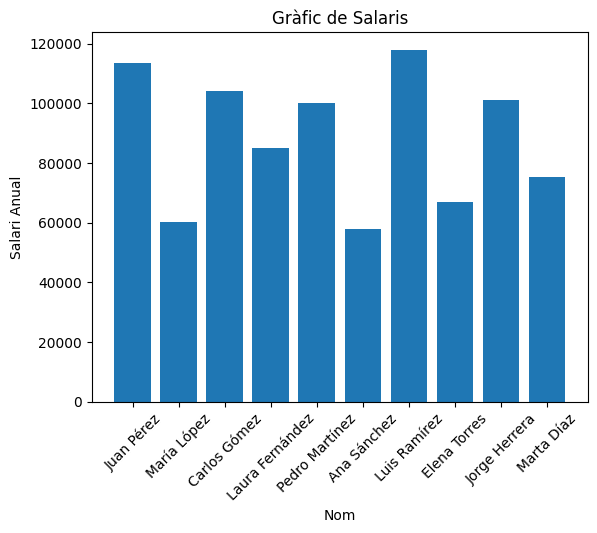

In [7]:
# Utilitzem la biblioteca PYPLOT per crear gràfics.
import matplotlib.pyplot as plt

# Gràfic d'exemple
plt.bar(data['Nombre'], data['Salario Anual'])  # Dibuixa un gràfic de barres
plt.title('Gràfic de Salaris')  # Afegeix un títol
plt.xlabel('Nom')  # Etiqueta de l'eix X
plt.ylabel('Salari Anual')  # Etiqueta de l'eix Y
plt.xticks(rotation=45)  # Rota les etiquetes de l'eix X per millorar la visibilitat
plt.show()



In [ ]:
# Farem servir la llibreria reportlab per crear el informe.
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Crear PDF
c = canvas.Canvas("Exercici_3_Output/informe.pdf", pagesize=letter)
c.drawString(100, 750, "Informe Generat amb ReportLab")
c.save()

Exercici 4
En aquest exercici caldrà generar un CSV amb les dades que treballareu. Recordeu que el CSV treballa amb comes. Un cop generat el CSV, caldrà bolcar les dades al Jupyter i comprovar que es mostren correctament.

Exemple:
Professor	Alumne	M01	M04	M03	M05
Emili	Xavier	7	9	5	8
Mario	Marc	10	3	5	8
Steven	Jaume	8	5	6	4
Restriccions:
El fitxer ha de contenir un mínim de 20 persones.
Cada registre ha de tenir 5 columnes amb dades.


In [2]:
import csv  # Importa el mòdul per treballar amb fitxers CSV
import random  # Importa el mòdul per generar nombres aleatoris
import os  # Importa el mòdul per gestionar el sistema d'arxius

# Crear carpeta de sortida si no existeix
output_dir = 'Exercici_4_Output'
os.makedirs(output_dir, exist_ok=True)  # Crea la carpeta si no existeix

# Ruta del fitxer CSV
csv_file_path = os.path.join(output_dir, 'dades_professors_alumnes.csv')

# Llistes d'exemple amb nous noms de professors i alumnes
professors = ['Carlos', 'Marta', 'Jorge', 'Susana', 'Luis', 'Beatriz', 'David', 'Elena', 'Fernando', 'Isabel']
alumnes = ['Adrián', 'Lucía', 'Raúl', 'Patricia', 'Sergio', 'Carmen', 'Diego', 'Ana', 'Rubén', 'Sonia']

# Obrim el fitxer CSV en mode escriptura
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)  # Creem l'objecte per escriure en el CSV
    
    # Escriure la capçalera del fitxer
    writer.writerow(['Professor', 'Alumne', 'M03', 'M05', 'M06', 'M07'])
    
    # Generar 20 registres amb dades aleatòries
    for _ in range(20):
        professor = random.choice(professors)  # Selecciona un professor a l'atzar
        alumne = random.choice(alumnes)  # Selecciona un alumne a l'atzar
        
        # Genera notes aleatòries entre 0 i 10 per a cada mòdul
        m01 = random.randint(0, 10)
        m04 = random.randint(0, 10)
        m03 = random.randint(0, 10)
        m05 = random.randint(0, 10)
        
        # Escriu la fila al fitxer CSV
        writer.writerow([professor, alumne, m01, m04, m03, m05])

# Missatge de confirmació
print(f"Fitxer CSV generat a: {csv_file_path}")


Fitxer CSV generat a: Exercici_4_Output\dades_professors_alumnes.csv


In [6]:
import pandas as pd

# Llegir el fitxer CSV amb les dades dels professors i alumnes
csv_path = 'Exercici_4_Output/dades_professors_alumnes.csv'
data = pd.read_csv(csv_file_path)

# Mostrar el contingut del DataFrame
data.head(6)

,Professor,Alumne,M03,M05,M06,M07
0,Carlos,Ruben,0,6,7,7
1,David,Raul,6,1,7,4
2,Jorge,Carmen,1,2,1,3
3,Jorge,Diego,6,4,0,2
4,Luis,Sergio,5,1,6,5
5,Fernando,Carmen,6,9,5,7


Exercici 5
Un cop tractades les dades introduïdes via fitxer, caldrà investigar la llibreria que hagueu triat i elaborar el codi necessari per presentar els resultats amb sentit dins l'àmbit del problema.

Exemples de càlculs:
La mitjana de nota final de cada alumne.
La mitjana de nota final de tots els alumnes conjuntament.
Percentatges d'aprovats i suspesos.
Notes més baixes o més altes.
Altres resultats interessants.
Restricció: generar com a mínim 5 resultats coherents amb un procés d’avaluació.

In [9]:
import pandas as pd
import numpy as np

# Carregar el fitxer CSV que conté les dades dels alumnes i les seves notes
data = pd.read_csv("Exercici_4_Output/dades_professors_alumnes.csv")

# Calcular la mitjana de nota final de cada alumne
data['Mitjana'] = data[['M03', 'M05', 'M06', 'M07']].mean(axis=1)

# Calcular la mitjana de nota final de tots els alumnes conjuntament
mitjana_general = data['Mitjana'].mean()

# Calcular el percentatge d'aprovats i suspesos
aprovats = data[data['Mitjana'] >= 5].shape[0]
suspesos = data[data['Mitjana'] < 5].shape[0]
percentatge_aprovats = (aprovats / data.shape[0]) * 100
percentatge_suspesos = (suspesos / data.shape[0]) * 100

# Calcular les notes més baixes i més altes
nota_mes_baixa = data[['M03', 'M05', 'M06', 'M07']].min().min()
nota_mes_alta = data[['M03', 'M05', 'M06', 'M07']].max().max()

# Altres resultats interessants
# Per exemple, la desviació estàndard de les notes finals
desviacio_estandard = data['Mitjana'].std()

# Mostrar els resultats
print("Mitjana de nota final de cada alumne:")
print(data[['Professor', 'Alumne', 'Mitjana']])
print("\nMitjana de nota final de tots els alumnes conjuntament:", mitjana_general)
print("\nPercentatge d'aprovats:", percentatge_aprovats, "%")
print("Percentatge de suspesos:", percentatge_suspesos, "%")
print("\nNota més baixa:", nota_mes_baixa)
print("Nota més alta:", nota_mes_alta)
print("\nDesviació estàndard de les notes finals:", desviacio_estandard)

Mitjana de nota final de cada alumne:
   Professor  Alumne  Mitjana
0     Carlos   Ruben     5.00
1      David    Raul     4.50
2      Jorge  Carmen     1.75
3      Jorge   Diego     3.00
4       Luis  Sergio     4.25
5   Fernando  Carmen     6.75
6      Marta  Adrian     7.50
7    Beatriz   Lucia     3.75
8       Luis     Ana     4.00
9      Marta   Ruben     4.25
10     David   Diego     8.25
11   Beatriz  Sergio     4.75
12    Isabel  Sergio     5.50
13     Jorge   Sonia     7.75
14     Elena   Ruben     5.00
15    Susana   Diego     0.75
16      Luis   Lucia     5.50
17    Isabel  Adrian     6.75
18     David    Raul     7.25
19     David  Carmen     2.25

Mitjana de nota final de tots els alumnes conjuntament: 4.925

Percentatge d'aprovats: 50.0 %
Percentatge de suspesos: 50.0 %

Nota més baixa: 0
Nota més alta: 10

Desviació estàndard de les notes finals: 2.0537193474023505



Exercici 6
De manera similar a l'Exercici 5, investigueu una llibreria per a la generació de gràfics visuals. Desenvolupeu el codi necessari per generar 4 gràfiques coherents. Es pot utilitzar la llibreria Python Matplotlib.

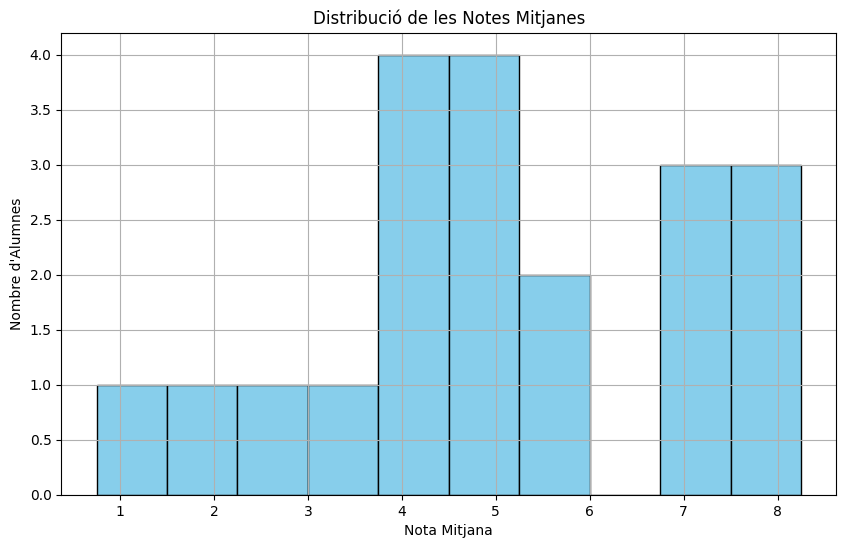

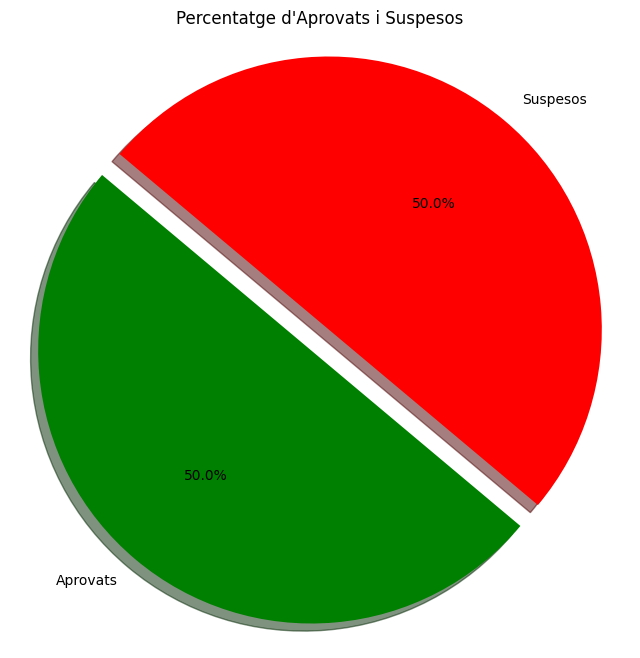

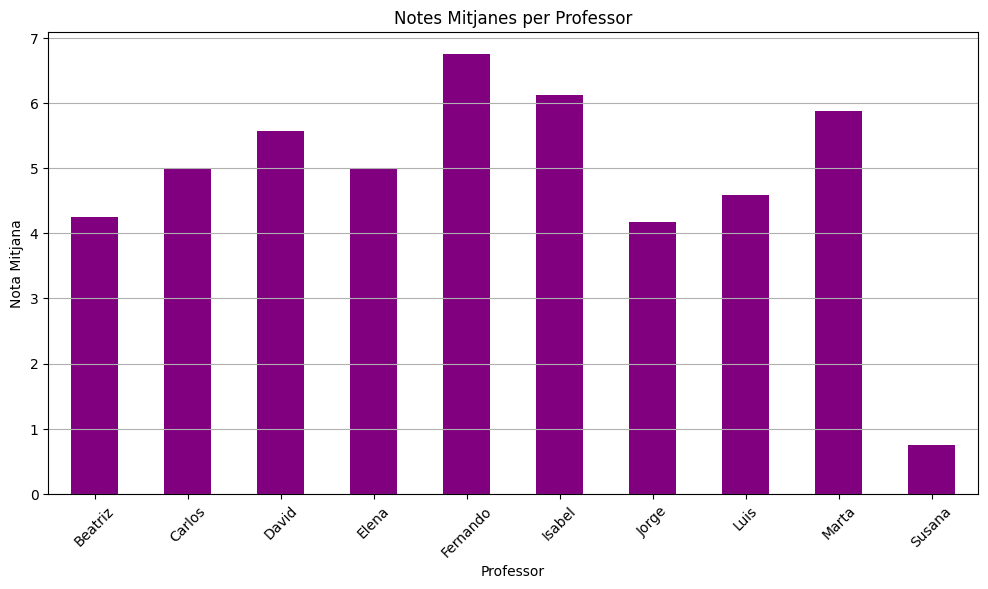

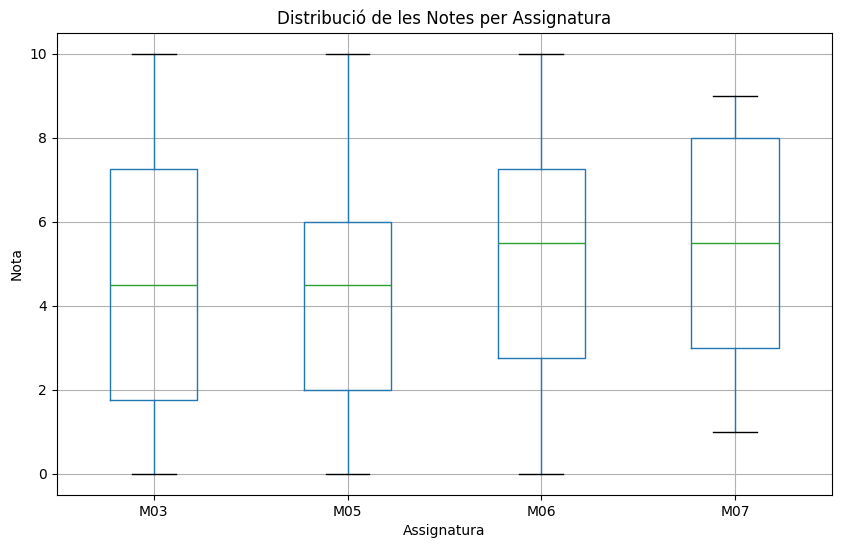

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar el fitxer CSV que conté les dades dels alumnes i les seves notes
data = pd.read_csv("Exercici_4_Output/dades_professors_alumnes.csv")

# Calcular la mitjana de nota final de cada alumne
data['Mitjana'] = data[['M03', 'M05', 'M06', 'M07']].mean(axis=1)

# Gràfic 1: Distribució de les notes mitjanes
plt.figure(figsize=(10, 6))
plt.hist(data['Mitjana'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribució de les Notes Mitjanes')
plt.xlabel('Nota Mitjana')
plt.ylabel('Nombre d\'Alumnes')
plt.grid(True)
plt.show()

# Gràfic 2: Percentatge d'aprovats i suspesos
aprovats = data[data['Mitjana'] >= 5].shape[0]
suspesos = data[data['Mitjana'] < 5].shape[0]
labels = ['Aprovats', 'Suspesos']
sizes = [aprovats, suspesos]
colors = ['green', 'red']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentatge d\'Aprovats i Suspesos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Gràfic 3: Notes mitjanes per professor
professor_means = data.groupby('Professor')['Mitjana'].mean()

plt.figure(figsize=(12, 6))
professor_means.plot(kind='bar', color='purple')
plt.title('Notes Mitjanes per Professor')
plt.xlabel('Professor')
plt.ylabel('Nota Mitjana')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Gràfic 4: Boxplot de les notes per assignatura
plt.figure(figsize=(10, 6))
data[['M03', 'M05', 'M06', 'M07']].boxplot()
plt.title('Distribució de les Notes per Assignatura')
plt.xlabel('Assignatura')
plt.ylabel('Nota')
plt.grid(True)
plt.show()

Exercici 7
Elaborar un informe amb les següents parts:

Informe de la part de logging, incloent el codi utilitzat, exemples d’utilització i resultats.  
Informe del tractament de dades, detallant cada part utilitzada i les gràfiques generades.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PIL import Image
import os

# Crear carpeta de sortida
output_dir = 'Exercici_7_Output'
os.makedirs(output_dir, exist_ok=True)

# Ruta de sortida del PDF
pdf_path = os.path.join(output_dir, "informe.pdf")

# Carregar el fitxer CSV que conté les dades dels alumnes i les seves notes
data = pd.read_csv("Exercici_4_Output/dades_professors_alumnes.csv")

# Calcular la mitjana de nota final de cada alumne
data['Mitjana'] = data[['M03', 'M05', 'M06', 'M07']].mean(axis=1)

# Generar i guardar les gràfiques
def generar_grafiques():
    # Gràfic 1: Distribució de les notes mitjanes
    plt.figure(figsize=(10, 6))
    plt.hist(data['Mitjana'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribució de les Notes Mitjanes')
    plt.xlabel('Nota Mitjana')
    plt.ylabel('Nombre d\'Alumnes')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, 'grafica1.png'))
    plt.close()

    # Gràfic 2: Percentatge d'aprovats i suspesos
    aprovats = data[data['Mitjana'] >= 5].shape[0]
    suspesos = data[data['Mitjana'] < 5].shape[0]
    labels = ['Aprovats', 'Suspesos']
    sizes = [aprovats, suspesos]
    colors = ['green', 'red']
    explode = (0.1, 0)  # Explode the first slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Percentatge d\'Aprovats i Suspesos')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig(os.path.join(output_dir, 'grafica2.png'))
    plt.close()

    # Gràfic 3: Notes mitjanes per professor
    professor_means = data.groupby('Professor')['Mitjana'].mean()

    plt.figure(figsize=(12, 6))
    professor_means.plot(kind='bar', color='purple')
    plt.title('Notes Mitjanes per Professor')
    plt.xlabel('Professor')
    plt.ylabel('Nota Mitjana')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.savefig(os.path.join(output_dir, 'grafica3.png'))
    plt.close()

    # Gràfic 4: Boxplot de les notes per assignatura
    plt.figure(figsize=(10, 6))
    data[['M03', 'M05', 'M06', 'M07']].boxplot()
    plt.title('Distribució de les Notes per Assignatura')
    plt.xlabel('Assignatura')
    plt.ylabel('Nota')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, 'grafica4.png'))
    plt.close()

# Funció per escalar imatges proporcionalment
def escalar_imatge(image_path, max_width, max_height):
    with Image.open(image_path) as img:
        width, height = img.size
        aspect_ratio = width / height

        if width > max_width:
            width = max_width
            height = width / aspect_ratio

        if height > max_height:
            height = max_height
            width = height * aspect_ratio

        return int(width), int(height)

# Funció per generar el PDF
def generar_informe(pdf_path):
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter
    current_y = height - 50  # Coordenada inicial

    # Títol
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, current_y, "Informe de Logging i Tractament de Dades")
    current_y -= 50

    # Secció 1: Logging
    c.setFont("Helvetica-Bold", 14)
    c.drawString(50, current_y, "1. Part de Logging")
    current_y -= 20

    c.setFont("Helvetica", 12)
    c.drawString(50, current_y, "Codi utilitzat:")
    current_y -= 20

    logging_code = '''
import logging
from logging import FileHandler, StreamHandler, Formatter
from time import sleep
import os

# Crear la carpeta per als fitxers de sortida si no existeix
output_dir = 'Exercici_2_Output'
os.makedirs(output_dir, existo=True)

# Configurar logger principal
logger = logging.getLogger('MainLogger')
logger.setLevel(logging.DEBUG)

# Manegador per als errors (i superiors)
error_handler = FileHandler(os.path.join(output_dir, 'errors.log'))
error_handler.setLevel(logging.ERROR)
error_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manegador per a info (i superiors)
info_handler = FileHandler(os.path.join(output_dir, 'info.log'))
info_handler.setLevel(logging.INFO)
info_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manegador per mostrar tot per pantalla
console_handler = StreamHandler()
console_handler.setLevel(logging.DEBUG)
console_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Afegir manegadors al logger principal
logger.addHandler(error_handler)
logger.addHandler(info_handler)
logger.addHandler(console_handler)

# Logger amb format CSV
csv_logger = logging.getLogger('CSVLogger')
csv_logger.setLevel(logging.INFO)

# Manegador per al logger CSV
csv_handler = FileHandler(os.path.join(output_dir, 'csv_logs.csv'))
csv_handler.setFormatter(Formatter('%(asctime)s, %(levelname)s, %(message)s'))
csv_logger.addHandler(csv_handler)

# Crear un bucle que generi logs de tipus INFO i ERROR
for i in range(40):
    sleep(1)
    if i % 2 == 0:
        logger.info(f"Aquest és el log d'informació número {i+1}")
    else:
        logger.error(f"Aquest és el log d'error número {i+1}")

# Missatge d'info addicional amb el logger CSV
csv_logger.info('Missatge especial registrat en format CSV.')
'''
    c.setFont("Courier", 8)
    textobject = c.beginText(50, current_y)
    for line in logging_code.splitlines():
        if current_y < 100:  # Canviar de pàgina si no hi ha espai
            c.drawText(textobject)
            c.showPage()
            textobject = c.beginText(50, height - 50)
            current_y = height - 50
        textobject.textLine(line)
        current_y -= 10
    c.drawText(textobject)

    # Secció 2: Tractament de Dades
    c.showPage()  # Canviar de pàgina
    current_y = height - 50
    c.setFont("Helvetica-Bold", 14)
    c.drawString(50, current_y, "2. Tractament de Dades i Gràfiques")
    current_y -= 30

    c.setFont("Helvetica", 12)
    c.drawString(50, current_y, "Gràfiques generades:")
    current_y -= 20

    # Inserir gràfiques amb dimensions ajustades
    grafiques = [
        ("Distribució de les Notes Mitjanes", "Exercici_7_Output/grafica1.png"),
        ("Percentatge d'Aprovats i Suspesos", "Exercici_7_Output/grafica2.png"),
        ("Notes Mitjanes per Professor", "Exercici_7_Output/grafica3.png"),
        ("Distribució de les Notes per Assignatura", "Exercici_7_Output/grafica4.png"),
    ]

    for titol, ruta in grafiques:
        if current_y < 200:  # Canviar de pàgina si no hi ha espai
            c.showPage()
            current_y = height - 50
        c.drawString(50, current_y, f"- {titol}:")
        current_y -= 20

        # Escalar imatge proporcionalment
        img_width, img_height = escalar_imatge(ruta, max_width=400, max_height=200)

        # Inserir imatge
        c.drawImage(ruta, 50, current_y - img_height, width=img_width, height=img_height)
        current_y -= img_height + 30

    # Final del document
    c.save()

# Generar les gràfiques
generar_grafiques()

# Generar l'informe
generar_informe(pdf_path)
print(f"Informe generat a: {pdf_path}")

Informe generat a: Exercici_7_Output\informe.pdf
